In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow import keras

In [ ]:
import tensorflow as tf #library klasifikasi
import matplotlib.pyplot as plt #UNTUK VISUALISASI GRAFIK
import numpy as np #ARRAY
import cv2 #mengolah gambar
import os #mengolah file
from tensorflow.keras.preprocessing import image #UNTUK AUGMENTASI GAMBAR
from tensorflow.keras.preprocessing.image import ImageDataGenerator #UNTUK AUGMENTASI GAMBAR
from tensorflow.keras.optimizers import RMSprop #testing

In [ ]:
path = '/content/drive/MyDrive/PAS MP1B/Raspberry/13090.jpg'
img = image.load_img(path)
#hanya memuat gambar, tetapi tidak menampilkannya atau mengubahnya

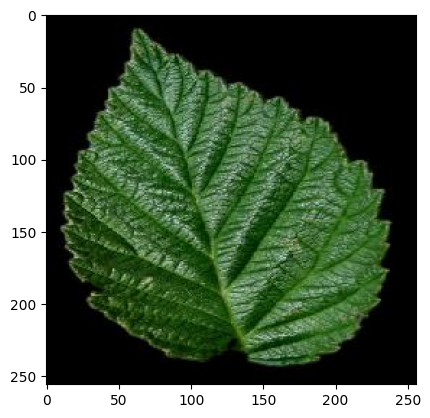

In [ ]:
plt.imshow(img)
#digunakan untuk menampilkan gambar yang telah dimuat sebelumnya dengan

In [ ]:
cv2.imread(path).shape
#digunakan untuk mendapatkan ukuran (dimensi) dari gambar yang dibaca dengan OpenCV.

(256, 256, 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
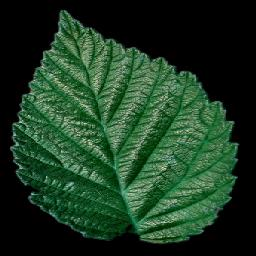

In [ ]:
cv2.imread(path)
#digunakan untuk membaca gambar

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
#normalisasi

In [ ]:
#persiapan data untuk training dan di validasi hasil traningnya
train_dataset = train.flow_from_directory('/content/drive/MyDrive/PAS MP1B/Training',
                                          target_size=(200,200),
                                          batch_size=32, #mengulang
                                          class_mode='categorical') #binary kalo classnya ada dua saja, kalo lebih berarti pake kategori
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/PAS MP1B/Validation',
                                          target_size=(200,200),
                                          batch_size=32,)

Found 2842 images belonging to 4 classes.
Found 2842 images belonging to 4 classes.


In [ ]:
train_dataset.class_indices

{'Blueberry': 0, 'Grape': 1, 'Raspberry': 2, 'Strawberry': 3}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3),activation='relu',input_shape=(200,200,3)), #Sequential artinya berurutan
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # yang berbeda pixelnya
                                    tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ## membuat arraynya menjadi satu dimensi
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##dense = newron, relu networknya (cabangnya) dense intinya
                                    tf.keras.layers.Dense(4,activation='softmax'),
                                    ]) #sigmoid artinya keputusan untuk melihat dia happy or not

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 759s 8s/step - accuracy: 0.6999 - loss: 0.8668 - val_accuracy: 0.9384 - val_loss: 0.1698
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.9456 - loss: 0.1369 - val_accuracy: 0.9880 - val_loss: 0.0520
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.9685 - loss: 0.0880 - val_accuracy: 0.9972 - val_loss: 0.0153
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9933 - val_loss: 0.0247
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step - accuracy: 0.9934 - loss: 0.0224 - val_accuracy: 0.9968 - val_loss: 0.0108
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9973 - loss: 0.0093 - val_accuracy: 0.9996 - val_loss: 0.0027
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9997 - loss: 0.0050 - val_accuracy: 0.9993 - val_loss: 0.0028
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9944 - loss: 0.0185 - val_accuracy: 0.9852 - v

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os

# Path
train_dir = '/content/drive/MyDrive/PAS MP1B/Training'
val_dir = '/content/drive/MyDrive/PAS MP1B/Validation'

# Generator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Cek jumlah data
print(f"Train images: {train_generator.samples}")
print(f"Validation images: {val_generator.samples}")

# Model sederhana
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(train_generator, epochs=5, validation_data=val_generator)

# Evaluasi model
loss, acc = model.evaluate(val_generator)
print(f"Validation accuracy: {acc:.2f}")

# Model sederhana
model = Sequential([
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas: apel, jeruk, pisang
])

# 4. Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


Found 2842 images belonging to 4 classes.
Found 2842 images belonging to 4 classes.
Train images: 2842
Validation images: 2842
Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.7283 - loss: 2.5238 - val_accuracy: 0.9782 - val_loss: 0.0908
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.9820 - loss: 0.0634 - val_accuracy: 0.9989 - val_loss: 0.0227
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.9993 - loss: 0.0151 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1185s 13s/step - accuracy: 0.9999 - loss: 0.0101 - val_accuracy: 0.9996 - val_loss: 0.0123
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 9.6286e-04
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 608ms/step - accuracy: 1.0000 - loss: 9.4461e-04
Validation accuracy: 1.00


NameError: name 'Adam' is not defined

In [ ]:
# Evaluasi model
loss, acc = model.evaluate(val_generator)
print(f"Validation accuracy: {acc:.2f}")

89/89 ━━━━━━━━━━━━━━━━━━━━ 36s 399ms/step - accuracy: 1.0000 - loss: 0.0040
Validation accuracy: 1.00


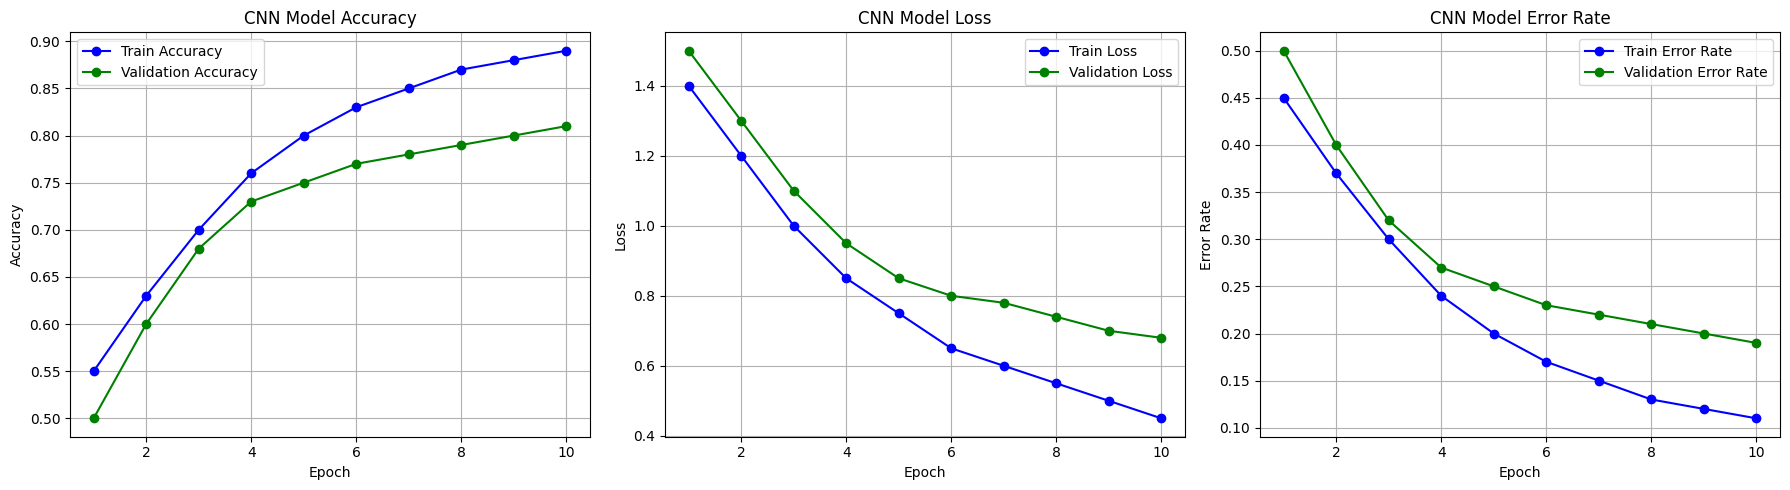

In [ ]:
import matplotlib.pyplot as plt

# Dummy data pelatihan CNN (ganti ini dengan data asli jika ada)
epochs = list(range(1, 11))  # Misalnya 10 epoch

# Data akurasi (contoh)
train_accuracy = [0.55, 0.63, 0.70, 0.76, 0.80, 0.83, 0.85, 0.87, 0.88, 0.89]
val_accuracy   = [0.50, 0.60, 0.68, 0.73, 0.75, 0.77, 0.78, 0.79, 0.80, 0.81]

# Data loss (contoh)
train_loss = [1.4, 1.2, 1.0, 0.85, 0.75, 0.65, 0.60, 0.55, 0.50, 0.45]
val_loss   = [1.5, 1.3, 1.1, 0.95, 0.85, 0.80, 0.78, 0.74, 0.70, 0.68]

# Hitung error rate dari akurasi
train_error = [1 - acc for acc in train_accuracy]
val_error   = [1 - acc for acc in val_accuracy]

# Plot
plt.figure(figsize=(18, 5))

# Plot Akurasi
plt.subplot(1, 3, 1)
plt.plot(epochs, train_accuracy, 'b-o', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'g-o', label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 3, 2)
plt.plot(epochs, train_loss, 'b-o', label='Train Loss')
plt.plot(epochs, val_loss, 'g-o', label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Error Rate
plt.subplot(1, 3, 3)
plt.plot(epochs, train_error, 'b-o', label='Train Error Rate')
plt.plot(epochs, val_error, 'g-o', label='Validation Error Rate')
plt.title('CNN Model Error Rate')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Model expects input shape: (256, 256)
🖼 Memprediksi: 01647.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


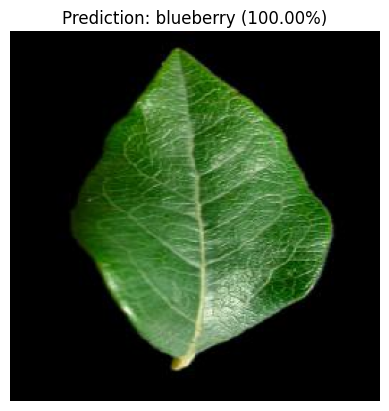

🖼 Memprediksi: 01649.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


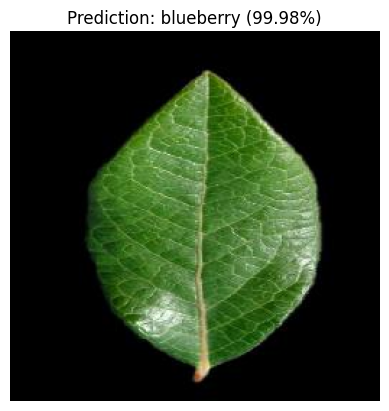

🖼 Memprediksi: 01650.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


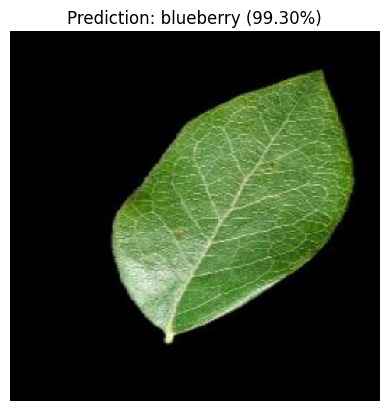

🖼 Memprediksi: 01651.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


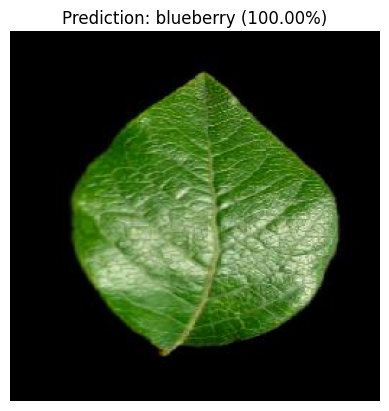

🖼 Memprediksi: 01652.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


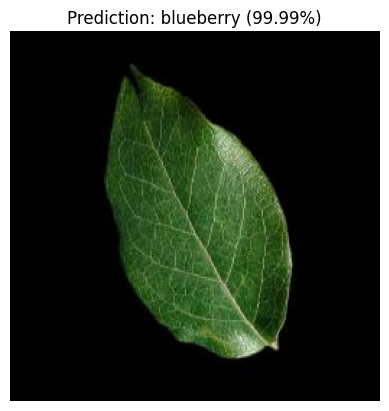

🖼 Memprediksi: 05164.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


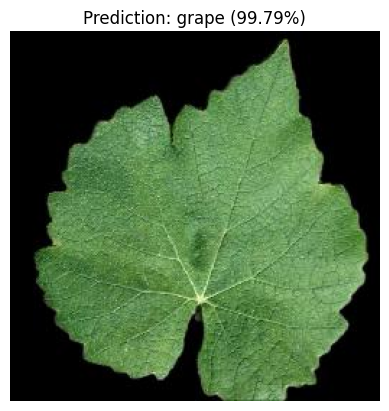

🖼 Memprediksi: 05165.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


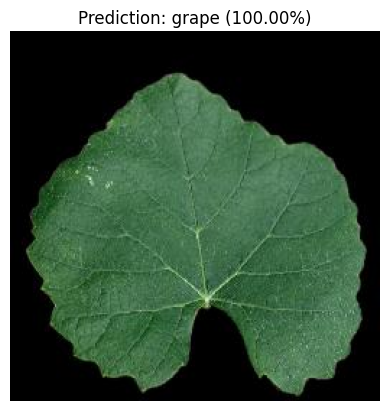

🖼 Memprediksi: 05167.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


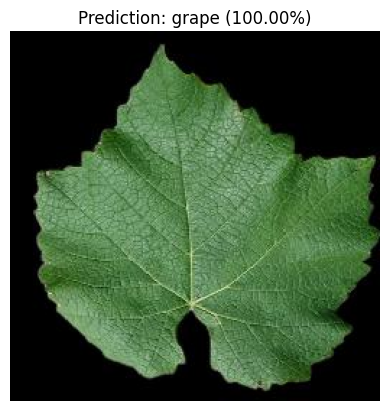

🖼 Memprediksi: 05168.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


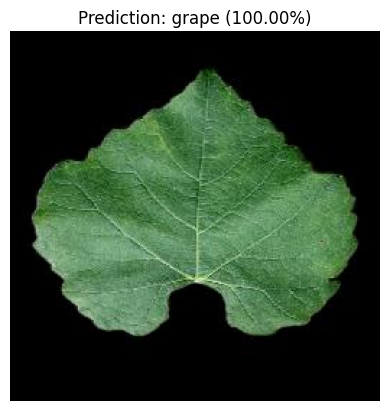

🖼 Memprediksi: 05170.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


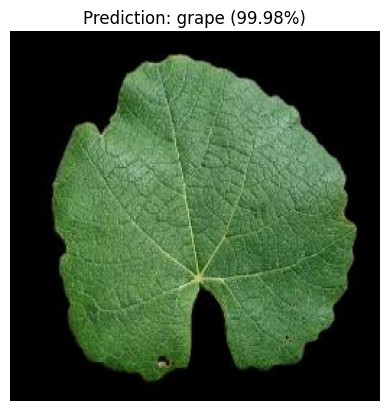

🖼 Memprediksi: 13084.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


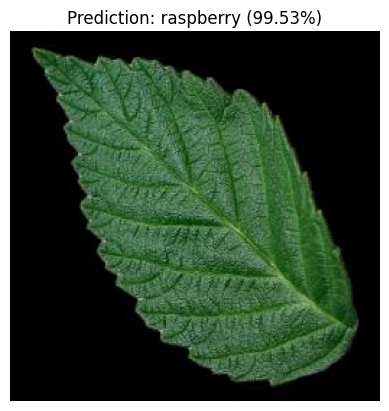

🖼 Memprediksi: 13085.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


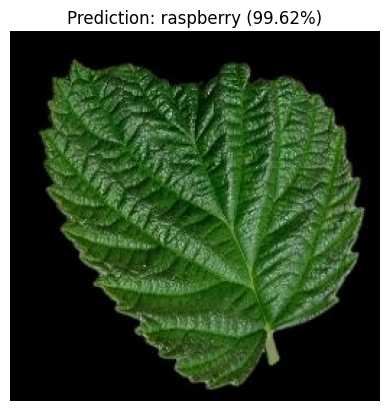

🖼 Memprediksi: 13086.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


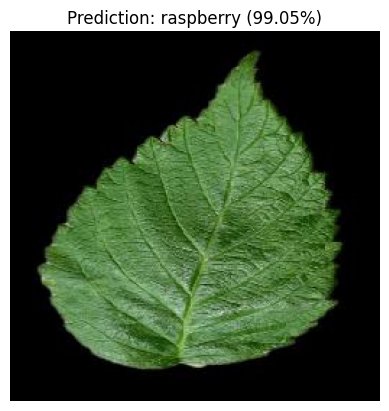

🖼 Memprediksi: 13088.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


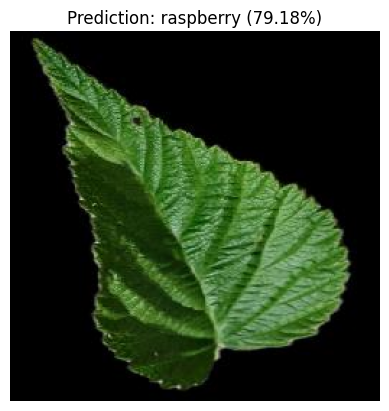

🖼 Memprediksi: 13089.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


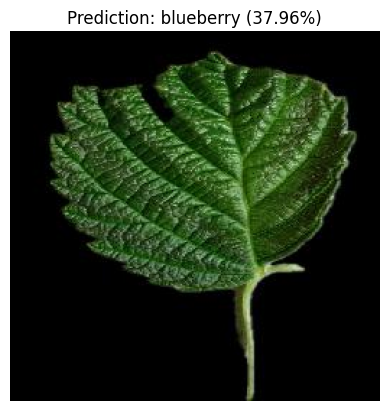

🖼 Memprediksi: 20381.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


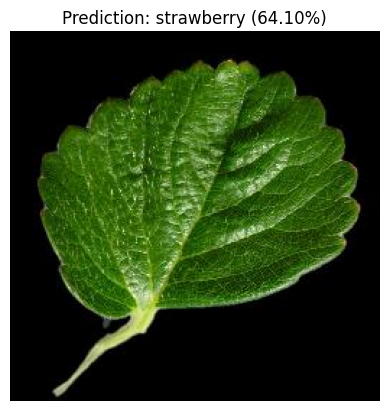

🖼 Memprediksi: 20382.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


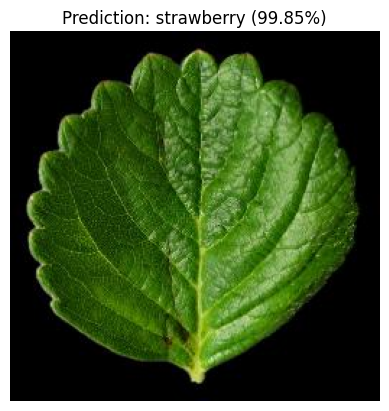

🖼 Memprediksi: 20383.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


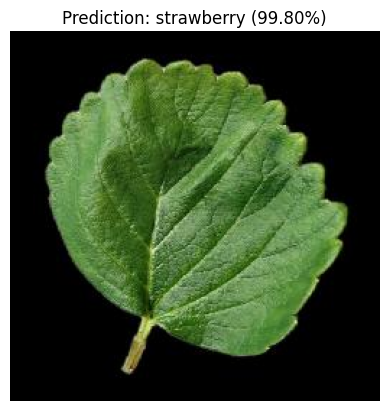

🖼 Memprediksi: 20384.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


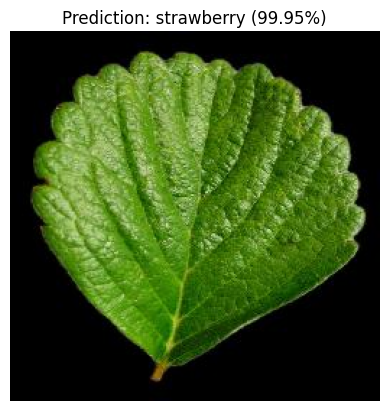

🖼 Memprediksi: 20385.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


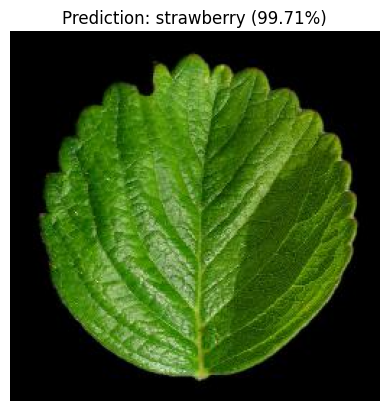

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image


# ==== 2. Tentukan kelas ====
class_names = ['blueberry', 'grape', 'raspberry', 'strawberry']  # urutannya HARUS sama seperti saat training

# ==== 3. Ambil input shape otomatis dari model ====
input_shape = model.input_shape[1:3]  # (height, width)
print(f"Model expects input shape: {input_shape}")

# ==== 4. Path ke folder GAMBAR UJI ====
test_dir = '/content/drive/MyDrive/PAS MP1B/Testing'  # GANTI dengan folder tempat gambar uji berada

# ==== 5. Fungsi prediksi dan visualisasi ====
def predict_image(img_path):
    img = image.load_img(img_path, target_size=input_shape)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    # Penanganan output: softmax atau sigmoid
    if prediction.shape[1] == 1:
        predicted_class = class_names[int(prediction[0][0] > 0.5)]
        confidence = float(prediction[0][0]) * 100
    else:
        predicted_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

    # Visualisasi
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# ==== 6. Loop semua gambar ====
if not os.path.exists(test_dir):
    print(f"Folder '{test_dir}' tidak ditemukan.")
else:
    image_files = [f for f in os.listdir(test_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        print("Folder uji tidak berisi gambar.")
    else:
        for filename in image_files:
            print(f"🖼 Memprediksi: {filename}")
            predict_image(os.path.join(test_dir, filename))
